In [8]:
import shutil
import numpy as np
import pandas as pd

from build_model import EkgClassification

import statsmodels.stats.api as sms

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


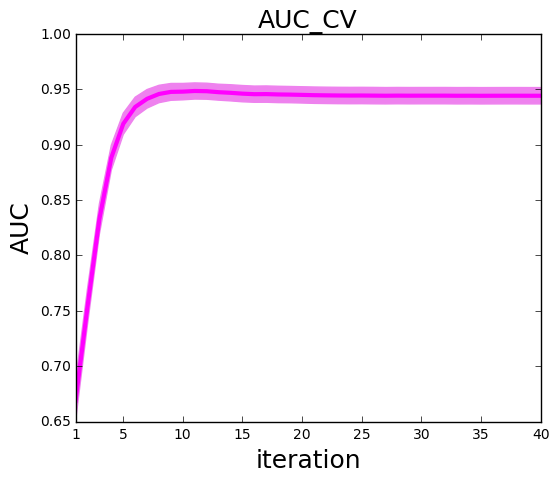

In [17]:
figure(figsize=(6, 5))

iters = range(1, n_collection_passes + 1, 1)
mean_auc = [np.mean(value) for key, value in auc_folds_iter.items()]

left_edge = []
right_edge = []
for key, value in auc_folds_iter.items():
    left, right = sms.DescrStatsW(value).tconfint_mean()
    left_edge.append(left)
    right_edge.append(right)


fill_between(iters, left_edge, right_edge, color='violet')
plot(iters, mean_auc, color='magenta', lw=3)

xlabel('iteration', fontsize=18)
xlim([1, n_collection_passes])
xticks(list(xticks()[0][1:]) + [1])

ylabel('AUC', fontsize=18)
title('AUC_CV', fontsize=18)

show()

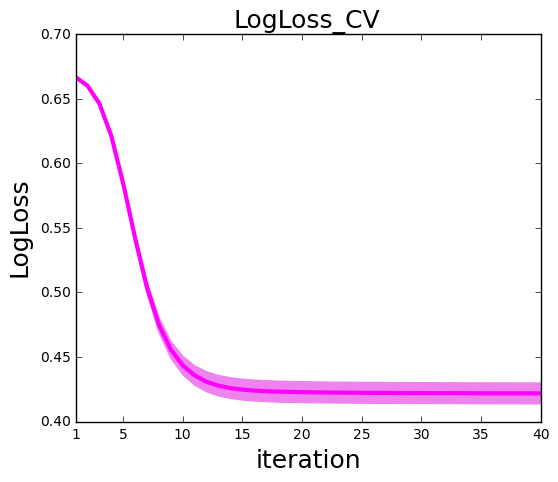

In [23]:
figure(figsize=(6, 5))

mean_logloss = [np.mean(value) for key, value in logloss_folds_iter.items()]

left_edge = []
right_edge = []
for key, value in logloss_folds_iter.items():
    left, right = sms.DescrStatsW(value).tconfint_mean()
    left_edge.append(left)
    right_edge.append(right)

fill_between(iters, left_edge, right_edge, color='violet')
plot(iters, mean_logloss, color='magenta', lw=3)

xlabel('iteration', fontsize=18)
xlim([1, n_collection_passes])
xticks(list(xticks()[0][1:]) + [1])

ylabel('LogLoss', fontsize=18)
title('LogLoss_CV', fontsize=18)

show()

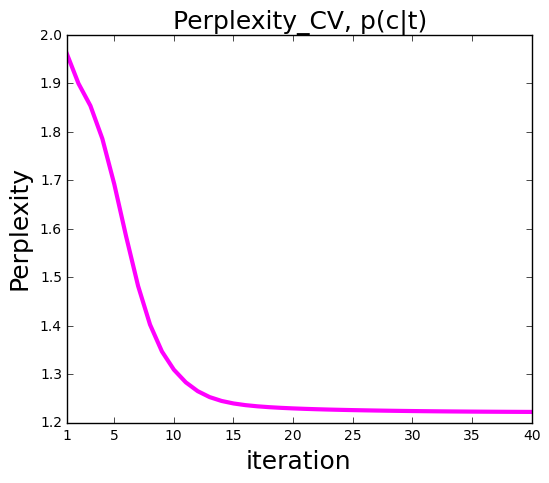

In [28]:
figure(figsize=(6, 5))

mean_perplexity_c = [np.mean(value) for key, value in perplexity_c.items()]


plot(iters, mean_perplexity_c, color='magenta', lw=3)

xlabel('iteration', fontsize=18)
xlim([1, n_collection_passes])
xticks(list(xticks()[0][1:]) + [1])
ylabel('Perplexity', fontsize=18)
title('Perplexity_CV, p(c|t)', fontsize=18)

show()

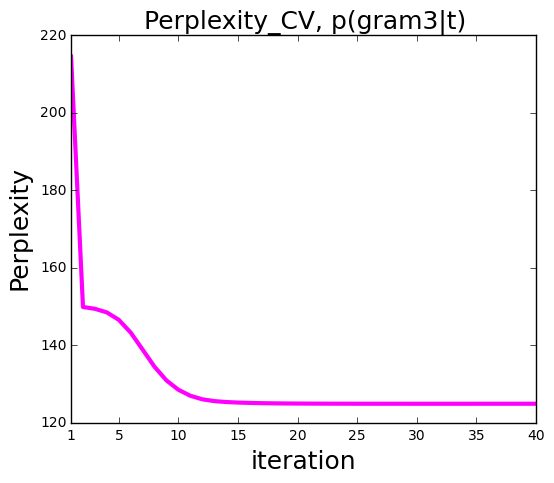

In [29]:
figure(figsize=(6, 5))

mean_perplexity_gram3 = [np.mean(value) for key, value in perplexity_gram3.items()]

plot(iters, mean_perplexity_gram3, color='magenta', lw=3)

xlabel('iteration', fontsize=18)
xlim([1, n_collection_passes])
xticks(list(xticks()[0][1:]) + [1])
ylabel('Perplexity', fontsize=18)
title('Perplexity_CV, p(gram3|t)', fontsize=18)

show()

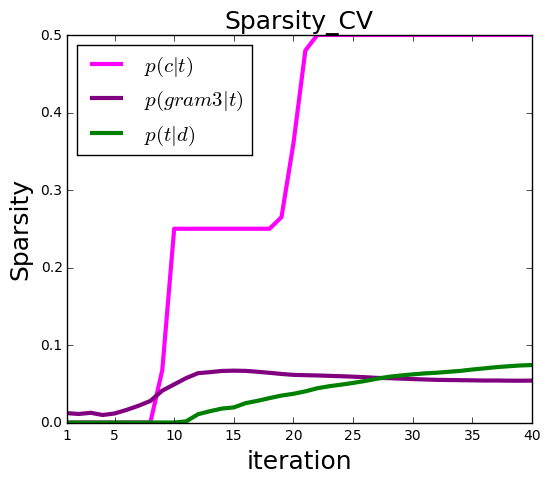

In [35]:
figure(figsize=(6, 5))

mean_sparsity_phi_c = [np.mean(value) for key, value in sparsity_phi_c.items()]
mean_sparsity_phi_gram3 = [np.mean(value)
                           for key, value in sparsity_phi_gram3.items()]
mean_sparsity_theta = [np.mean(value) for key, value in sparsity_theta.items()]

plot(iters, mean_sparsity_phi_c, color='magenta', lw=3)
plot(iters, mean_sparsity_phi_gram3, color='purple', lw=3)
plot(iters, mean_sparsity_theta, color='green', lw=3)

xlabel('iteration', fontsize=18)
xlim([1, n_collection_passes])
xticks(list(xticks()[0][1:]) + [1])
ylabel('Sparsity', fontsize=18)
title('Sparsity_CV', fontsize=18)
legend([r'$p(c|t)$', r'$p(gram3|t)$', r'$p(t|d)$'], loc = 'upper left', fontsize = 15)

show()

In [3]:
import shutil
shutil.rmtree(data_dir)

In [ ]:
data_dir = 'data_ekg'
n_objs = 372
n_topics = 2
n_collection_passes = 40
n_document_passes = 1
n_shuffles = 10
n_folds = 10
clf = EkgClassification(data_dir, 
                        n_objs,
                        n_topics,
                        n_collection_passes, 
                        n_document_passes,
                        n_shuffles,
                        n_folds)


tau   = np.repeat([1e2, 1e3, 1e4, 1e4], 10)
w_gram3   = np.repeat([1e0, 1e1, 1e2, 1e2], 10)

tau_theta = np.linspace(0, -1e-3, 40)
tau_phi_gram3 = np.linspace(0, -1e-3A, 40)

(auc_folds_iter, 
 logloss_folds_iter, 
 perplexity_c, 
 perplexity_gram3, 
 sparsity_phi_c, 
 sparsity_phi_gram3, 
 sparsity_theta, 
 ptc) = clf.build_model(tau, w_gram3, tau_theta, tau_phi_gram3)

In [26]:
min_tau = np.min(tau)
max_tau = np.max(tau)

def store_results(res_name, res):
    os.mkdir('topics{}_tau{}_{}'.format(n_topics, min_tau, max_tau))
    file_name = '{}_topics{}_tau{}_{}.txt'.format(
        res_name, n_topics, min_tau, max_tau)

    with open(file_name, 'w') as fout:
        for key, values in res.items():
            for value in values:
                fout.write('{} '.format(value))
            fout.write('\n')

store_results('auc', auc_folds_iter)
store_results('logloss', logloss_folds_iter)
store_results('perplexity_gram3', perplexity_gram3)
store_results('perplexity_c', perplexity_c)
store_results('sparsity_gram3', sparsity_gram3)
store_results('sparsity_c', sparsity_c)

pd.DataFrame.from_dict(ptc).to_csv(
    'ptc_topics{}_tau{}_{}.csv'.format(
        n_topics, min_tau, max_tau))